In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

import pingouin as pg

C:\Users\Larsen\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
df = pd.read_excel("data/baza_HR_v5.xlsx")
df.head()

,Numbers,ageattest,Gender,CR_Code,ethnic_code,height inch->cm,weight Ib->kg,BMI,waist,bodyfat,...,W_step3_F_LT,W_step3_F_GT,W_step3_F_EQ,W_step3_M,W_step3_F,W_step4_M,W_step4_F,Wasserman_vo2_l_kg_min,HRmax1,HRmax2
0,2570,42.0,Male,2.0,0.0,186.70,84.81,24.330914,84.40,14.610523,...,1950.034300,1938.650200,1998.9484,3011.289444,1938.650200,3342.531283,2151.901722,39.411995,178.0,178.96
1,1,55.0,Female,2.0,4.0,159.99,87.79,34.297256,NaN,NaN,...,1577.914203,1558.897705,1756.5097,2120.430346,1558.897705,2120.430346,1558.897705,17.757122,165.0,169.60
2,2,62.0,Female,2.0,4.0,157.00,78.09,31.680798,NaN,44.800000,...,1366.840800,1364.580000,1482.1416,1840.014480,1364.580000,1840.014480,1364.580000,17.474453,158.0,164.56
3,3,36.0,Male,3.0,NaN,172.72,73.75,24.721611,NaN,NaN,...,1909.385940,1899.408880,1945.0550,2790.245603,1899.408880,2790.245603,1899.408880,37.833839,184.0,183.28
4,4,58.0,Male,2.0,0.0,185.42,80.82,23.507459,93.01,23.100000,...,1579.747780,1578.323160,1599.7544,2427.721430,1578.323160,2427.721430,1578.323160,30.038622,162.0,167.44


In [24]:
get = ['VO2_Mayers', 'Wasserman_vo2_l_kg_min', 'HRmax1', 'HRmax2', 'max_hr','vo2_ml_kg_min']

In [25]:
baseline = df[get].dropna()

In [26]:
baseline.head()

,VO2_Mayers,Wasserman_vo2_l_kg_min,HRmax1,HRmax2,max_hr,vo2_ml_kg_min
0,39.774325,39.411995,178.0,178.96,166.00,47.8
1,20.169964,17.757122,165.0,169.60,142.00,45.6
2,20.155835,17.474453,158.0,164.56,160.00,29.0
3,45.210978,37.833839,184.0,183.28,166.73,13.2
4,34.651472,30.038622,162.0,167.44,183.00,22.9


# HRmax

Formula1

------------------------------
OVERALL RRMSE
1.0343500288764966
OVERALL RMSE
20.74609170534569


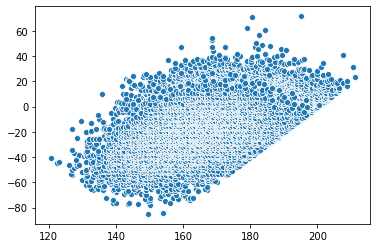

In [28]:
y = baseline['max_hr']
y_pred_1 = baseline['HRmax1']
RRMSE = 1 - r2_score(y, y_pred_1)
print("------------------------------")
print("OVERALL RRMSE")
print(RRMSE)
print("OVERALL RMSE")
print(math.sqrt(mean_squared_error(y, y_pred_1)))
# BLAND-ALTMAN plot
sns.scatterplot(x=((y + y_pred_1) / 2), y=(y - y_pred_1))

In [32]:
pg.corr(y_pred_1, y) # change is significant, recet null hypostesis is favor of alternative (they are correlated)!

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,21263,0.408526,"[0.4, 0.42]",0.166894,0.166815,0.0,inf,1.0


Formula2

------------------------------
OVERALL RRMSE
1.084514826527646
OVERALL RMSE
21.24321647329979


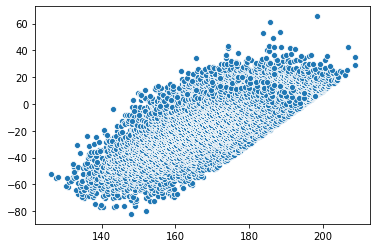

In [30]:
y = baseline['max_hr']
y_pred_2 = baseline['HRmax2']
RRMSE = 1 - r2_score(y, y_pred_2)
print("------------------------------")
print("OVERALL RRMSE")
print(RRMSE)
print("OVERALL RMSE")
print(math.sqrt(mean_squared_error(y, y_pred_2)))
# BLAND-ALTMAN plot
sns.scatterplot(x=((y + y_pred_2) / 2), y=(y - y_pred_2))

In [31]:
pg.corr(y_pred_2, y) # change is significant, recet null hypostesis is favor of alternative (they are correlated)!

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,21263,0.408526,"[0.4, 0.42]",0.166894,0.166815,0.0,inf,1.0


# VO2max

Mayer


------------------------------
OVERALL RRMSE
1.4480194819437227
OVERALL RMSE
12.944396619722406


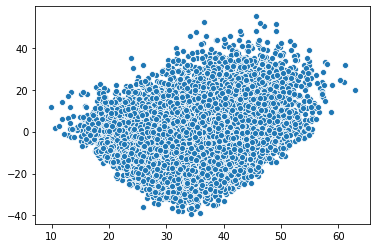

In [42]:
y = baseline['vo2_ml_kg_min']
y_pred = baseline['VO2_Mayers']
RRMSE = 1 - r2_score(y, y_pred)
print("------------------------------")
print("OVERALL RRMSE")
print(RRMSE)
print("OVERALL RMSE")
print(math.sqrt(mean_squared_error(y, y_pred)))
# BLAND-ALTMAN plot
sns.scatterplot(x=((y + y_pred) / 2), y=(y - y_pred))

Wasserman

------------------------------
OVERALL RRMSE
1.3630646856647683
OVERALL RMSE
12.558935846666998


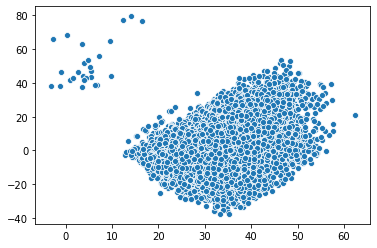

In [48]:
y = baseline['vo2_ml_kg_min']
y_pred = baseline['Wasserman_vo2_l_kg_min']
RRMSE = 1 - r2_score(y, y_pred)
print("------------------------------")
print("OVERALL RRMSE")
print(RRMSE)
print("OVERALL RMSE")
print(math.sqrt(mean_squared_error(y, y_pred)))
# BLAND-ALTMAN plot
sns.scatterplot(x=((y + y_pred) / 2), y=(y - y_pred))